In [1]:
import pandas as pd
from datetime import date
from datetime import timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

import matplotlib.pyplot as plt 
import math
import scipy.stats as stats

#my custom lib with stat tests
from lib_tests import *

In [2]:
df_orders = pd.read_csv('orders.csv')
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [3]:
df_visitors = pd.read_csv('visitors.csv')
df_visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [4]:
df_visitors_piv = df_visitors.pivot(index = 'date', columns = 'group', values = 'visitors')
df_visitors_piv.head()

group,A,B
date,,
2019-08-01,719,713
2019-08-02,619,581
2019-08-03,507,509
2019-08-04,717,770
2019-08-05,756,707


<Axes: xlabel='date'>

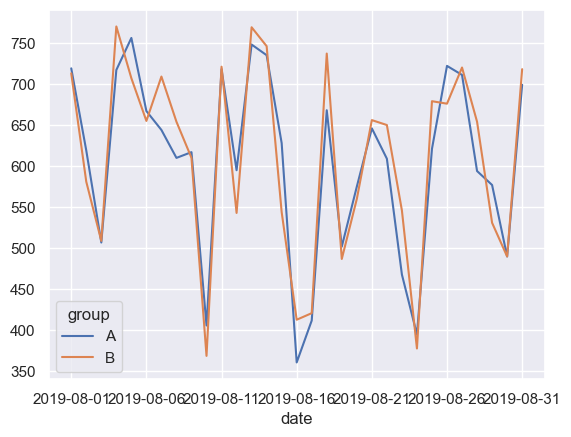

In [5]:
df_visitors_piv.plot()

In [6]:
df_visitors_piv.sum()

group
A    18736
B    18916
dtype: int64

In [7]:
print('# of rows: ', len(df_orders['transactionId']))
print('# of transactions: ', len(set(df_orders['transactionId'])))
print('# of users: ', len(set(df_orders['visitorId'])))

# of rows:  1197
# of transactions:  1197
# of users:  1031


In [8]:
#there is no null in the table
df_orders.loc[df_orders.isnull().any(axis = 1)]

,transactionId,visitorId,date,revenue,group


In [9]:
#there is no strange values of revenue
df_orders.loc[~(df_orders['revenue'] > 0)]

,transactionId,visitorId,date,revenue,group


In [10]:
#there are some users who was in A and B groups... 
df_orders[['visitorId', 'group']].groupby('visitorId').nunique().sort_values(by = 'group').tail(1)

,group
visitorId,
2579882178,2


In [12]:
df_spoiled_users = df_orders[['visitorId', 'group']].groupby('visitorId').nunique()
df_spoiled_users = df_spoiled_users.loc[df_spoiled_users.group > 1]
print('There are ', len(df_spoiled_users), ' users who got into both groups')
list_spoiled_users = list(df_spoiled_users.index)

There are  58  users who got into both groups


In [13]:
#df_orders_cleaned = df_orders.copy()

df_orders_cleaned = df_orders.loc[~df_orders['visitorId'].isin(list_spoiled_users)]

print('# of rows: ', len(df_orders_cleaned['transactionId']))
print('# of transactions: ', len(set(df_orders_cleaned['transactionId'])))
print('# of users: ', len(set(df_orders_cleaned['visitorId'])))

# of rows:  1016
# of transactions:  1016
# of users:  973


<Axes: >

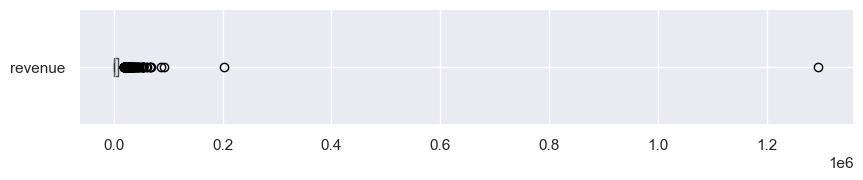

In [14]:
df_orders_cleaned[['revenue']].boxplot(vert=False, figsize=(10, 1.5))

In [15]:
df_orders_cleaned.sort_values('revenue').tail(15)

,transactionId,visitorId,date,revenue,group
1137,2183069967,759473111,2019-08-13,52480,A
1006,1861540412,2261934787,2019-08-10,52900,A
1142,3815014015,2606908679,2019-08-13,52900,B
613,4071177889,3931967268,2019-08-07,53904,B
287,587872075,2254456485,2019-08-24,53904,A
131,3163614039,2254586615,2019-08-22,53904,A
940,2420050534,4003628586,2019-08-08,58550,B
949,1347999392,887908475,2019-08-21,60450,A
1099,316924019,148427295,2019-08-12,65710,A
1103,1348774318,1164614297,2019-08-12,66350,A


array([[<Axes: title={'center': 'revenue'}>]], dtype=object)

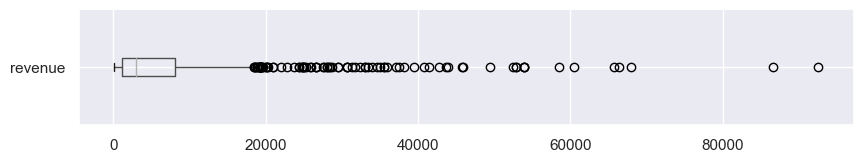

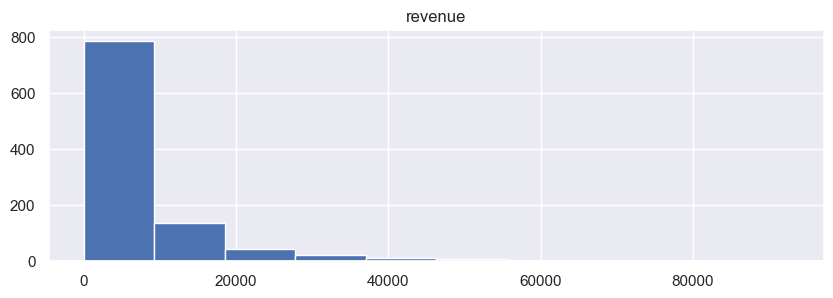

In [16]:
df_orders_cleaned = df_orders_cleaned.loc[df_orders_cleaned.revenue < 200000]

#q1 = np.percentile(df_orders_cleaned['revenue'], 25)
#q3 = np.percentile(df_orders_cleaned['revenue'], 75)
#iqr = q3 - q1
#upper_whisker = q3 + 1.5 * iqr
#df_orders_cleaned = df_orders_cleaned.loc[df_orders_cleaned.revenue < upper_whisker]

df_orders_cleaned[['revenue']].boxplot(vert=False, figsize=(10, 1.5))
df_orders_cleaned[['revenue']].hist( figsize=(10, 3))

In [17]:
print('# of rows: ', len(df_orders_cleaned['transactionId']))
print('# of transactions: ', len(set(df_orders_cleaned['transactionId'])))
print('# of users: ', len(set(df_orders_cleaned['visitorId'])))

# of rows:  1014
# of transactions:  1014
# of users:  971


In [18]:
df_users_with_many_orders = df_orders_cleaned.groupby(by = 'visitorId').nunique()
df_users_with_many_orders = df_users_with_many_orders.loc[df_users_with_many_orders.transactionId > 1]

In [19]:
df_orders_cleaned.loc[df_orders_cleaned['visitorId'].isin([2108163459, 611059232])]

,transactionId,visitorId,date,revenue,group
104,627804981,611059232,2019-08-01,17600,A
144,365058890,611059232,2019-08-01,2750,A
145,735232225,611059232,2019-08-01,8800,A
507,4067849009,2108163459,2019-08-06,580,A
740,405281389,2108163459,2019-08-09,580,A
918,3839104003,2108163459,2019-08-08,690,A


In [20]:
print(len(df_users_with_many_orders.loc[df_users_with_many_orders.date>1]), ' visitors have orders in several dates' )

25  visitors have orders in several dates


In [21]:
df_orders_total = df_orders_cleaned.groupby(by = 'group').agg({'revenue':'sum', 'visitorId': 'nunique', 'transactionId': 'count'})
df_orders_total = df_orders_total.reset_index()
df_orders_total = df_orders_total.rename(columns = {'revenue':'revenue sum', 'visitorId': 'visitor nunique', 'transactionId': 'transaction count'})
df_orders_total.head()

,group,revenue sum,visitor nunique,transaction count
0,A,3364656,445,468
1,B,3571732,526,546


In [22]:
df_orders_piv = df_orders_cleaned.groupby(by = ['date', 'group']).agg({'revenue':'sum', 'visitorId': 'nunique', 'transactionId': 'count'})
df_orders_piv = df_orders_piv.reset_index()
df_orders_piv = df_orders_piv.rename(columns = {'revenue':'revenue sum', 'visitorId': 'visitor nunique', 'transactionId': 'transaction count'})
columns_for_piv = ['revenue sum', 'visitor nunique', 'transaction count']
df_orders_piv = df_orders_piv.pivot(index = 'date', columns = 'group', values = columns_for_piv)
df_orders_piv.head()

revenue sum         visitor nunique     transaction count    
group                A       B               A   B                 A   B
date                                                                    
2019-08-01      142779   59758              19  17                23  17
2019-08-02       91602  162043              18  22                19  23
2019-08-03      112473   67049              24  14                24  14
2019-08-04       41176   96890              11  13                11  14
2019-08-05       86383   89908              22  21                22  21

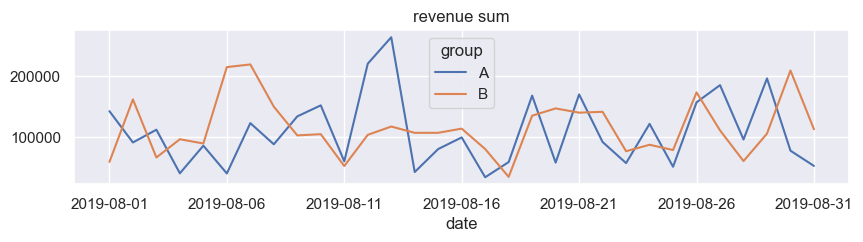

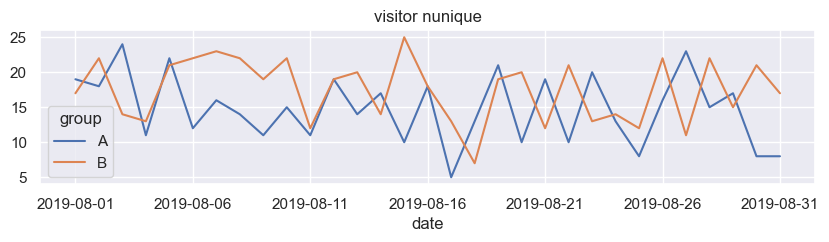

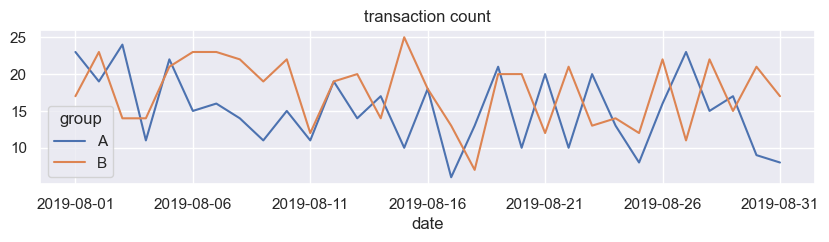

In [23]:
for c in columns_for_piv:
    df_orders_piv[c].plot(title = c, figsize=(10, 2))

Move to the visitorId+date

In [24]:
# move to the visitorId+date

df_orders_new = df_orders_cleaned[[ 'visitorId', 'date', 'revenue', 'group']].groupby(by = ['visitorId', 'date', 'group']).sum()
df_orders_new = df_orders_new.reset_index()
df_orders_new.head()

,visitorId,date,group,revenue
0,5114589,2019-08-16,B,570
1,6958315,2019-08-04,B,1490
2,11685486,2019-08-23,A,6201
3,39475350,2019-08-08,B,3990
4,47206413,2019-08-10,B,730


In [25]:
df_conv_rate = df_orders_new.groupby(['date', 'group']).agg({'revenue':'sum', 'visitorId':'count'})
df_conv_rate.columns = ['revenue', 'visitors with tran count']
df_conv_rate = df_conv_rate.join(df_visitors.set_index(['date', 'group']))
tmp = df_conv_rate.columns
df_conv_rate = df_conv_rate.reset_index()
df_conv_rate = df_conv_rate.pivot(index = 'date', columns = 'group', values = tmp)
df_conv_rate.columns = ['revenue A', 'revenue B', 
                        'visitors with tran count A', 'visitors with tran count B',
                        'visitors A', 'visitors B']
df_conv_rate.head()

,revenue A,revenue B,visitors with tran count A,visitors with tran count B,visitors A,visitors B
date,,,,,,
2019-08-01,142779,59758,19,17,719,713
2019-08-02,91602,162043,18,22,619,581
2019-08-03,112473,67049,24,14,507,509
2019-08-04,41176,96890,11,13,717,770
2019-08-05,86383,89908,22,21,756,707


In [26]:
for i in ['A', 'B']:
    df_conv_rate['conversion '+ i] = df_conv_rate['visitors with tran count ' + i]/df_conv_rate['visitors '+ i]
    df_conv_rate['revenue per visitor ' + i] = df_conv_rate['revenue ' + i]/df_conv_rate['visitors '+ i]

<Axes: title={'center': 'convertion from visit to transaction'}, xlabel='date'>

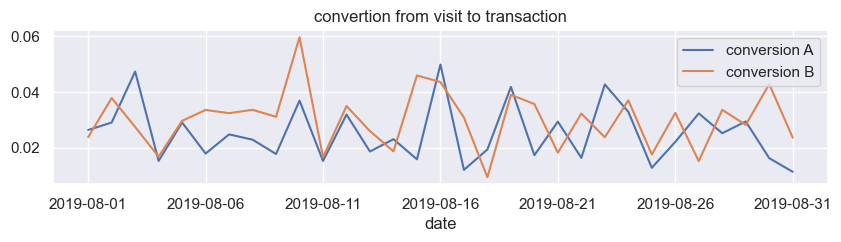

In [27]:
df_conv_rate[['conversion A', 'conversion B']].plot(title = 'convertion from visit to transaction', figsize=(10, 2))

<Axes: title={'center': 'revenue per visitor'}, xlabel='date'>

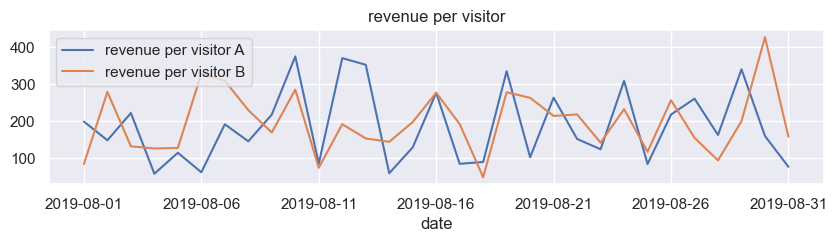

In [28]:
df_conv_rate[['revenue per visitor A', 'revenue per visitor B']].plot(title = 'revenue per visitor', figsize=(10, 2))

## Ttest for visitor+date


In [29]:
print('# of visitors_date during the test')
df_visitors_piv.sum()

# of visitors_date during the test


group
A    18736
B    18916
dtype: int64

In [30]:
l_reveue_A = list(df_orders_new.loc[df_orders_new.group == 'A'].revenue)
l_reveue_B = list(df_orders_new.loc[df_orders_new.group == 'B'].revenue)

In [31]:
extra_len_A = df_visitors_piv.sum()['A'] - len(l_reveue_A)
l_reveue_A = l_reveue_A + [0]*extra_len_A
print(len(l_reveue_A))
extra_len_B = df_visitors_piv.sum()['B'] - len(l_reveue_B)
l_reveue_B = l_reveue_B + [0]*extra_len_B
print(len(l_reveue_B))

18736
18916


In [ ]:
# l_reveue_A/B - is a list, each element is revenue of one visitor+date. 
# If visitor+date does not have a transaction, then revenue is 0.

In [32]:
df_reveue_A = pd.DataFrame(l_reveue_A, columns = ['revenue'])
df_reveue_B = pd.DataFrame(l_reveue_B, columns = ['revenue'])

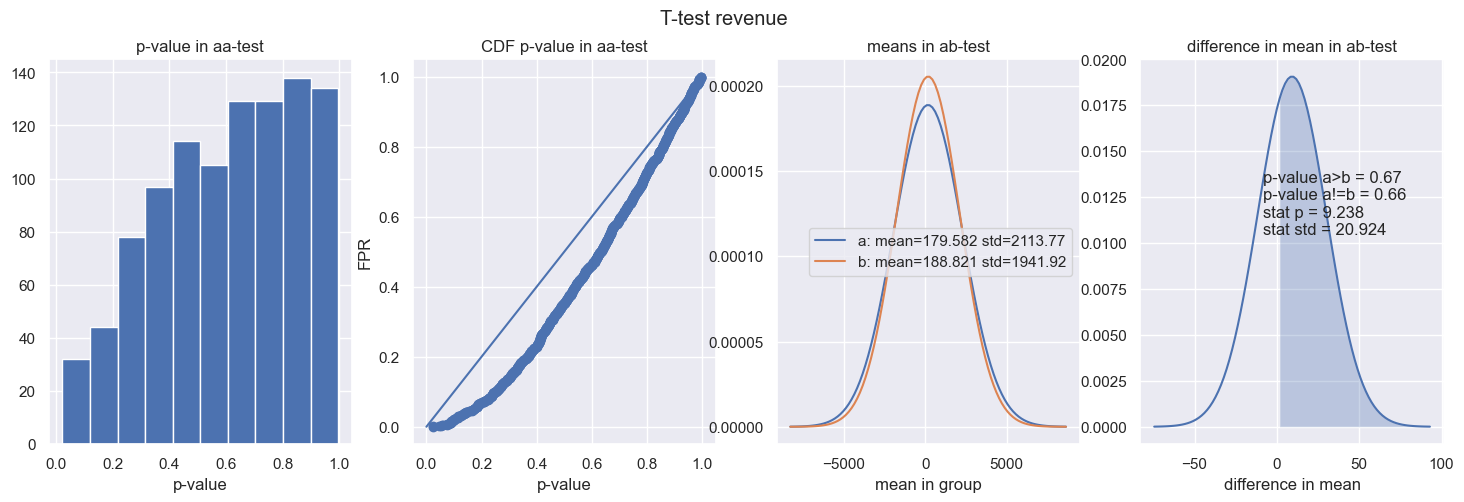

In [33]:
fun_perfom_ttest(df_reveue_A, df_reveue_B, 'revenue')
# p-value overestimates FPR, thus it we could not use this test(((

In [ ]:
# I tried others tests (bootstrap and mannwhitneyu), but my laptop could not handle them((

## Other approach: conversion and avg revenue seperatly

In [ ]:
# Conversion

In [34]:
l_reveue_A_con = [(i if i == 0 else 1) for i in l_reveue_A ]
l_reveue_B_con = [(i if i == 0 else 1) for i in l_reveue_B ]
df_reveue_A_con = pd.DataFrame(l_reveue_A_con, columns = ['revenue'])
df_reveue_B_con = pd.DataFrame(l_reveue_B_con, columns = ['revenue'])

In [35]:
print('A trials: ', str(len(l_reveue_A_con)), ', conversions: ', str(sum(l_reveue_A_con)))
print('B trials: ', str(len(l_reveue_B_con)), ', conversions: ', str(sum(l_reveue_B_con)))

A trials:  18736 , conversions:  457
B trials:  18916 , conversions:  542


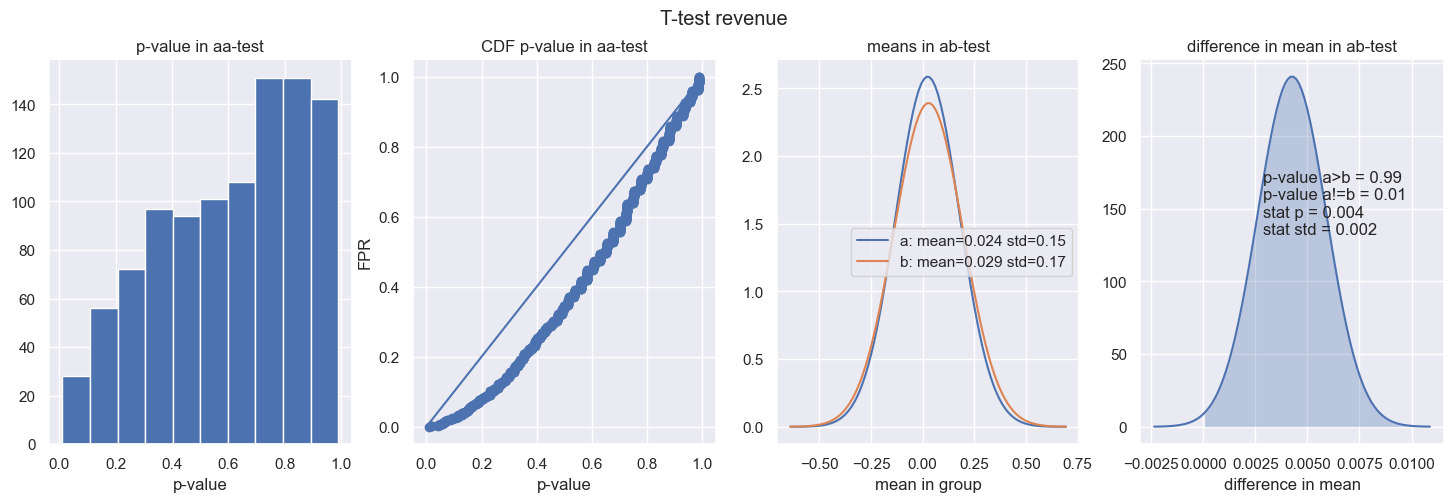

In [36]:
fun_perfom_ttest(df_reveue_A_con, df_reveue_B_con, 'revenue')


/Users/dasha/AnacondaProjects/TripleTen/lib_tests.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


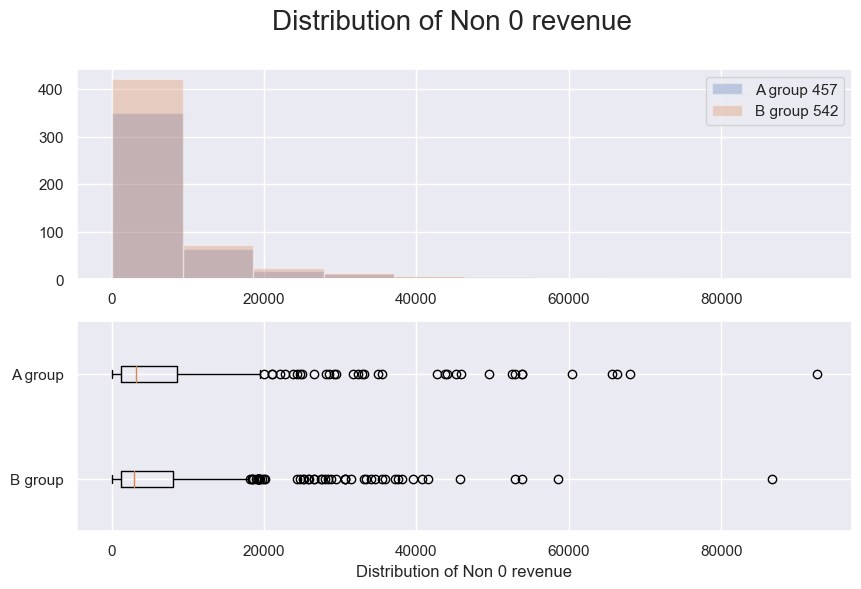

In [37]:
df_reveue_A_ren = df_orders_new.loc[df_orders_new.group == 'A'][['revenue']]
df_reveue_B_ren = df_orders_new.loc[df_orders_new.group == 'B'][['revenue']]
fun_draw_distribution_nicely([df_reveue_A_ren['revenue'], df_reveue_B_ren['revenue']], ['A group', 'B group'], 'Distribution of Non 0 revenue')

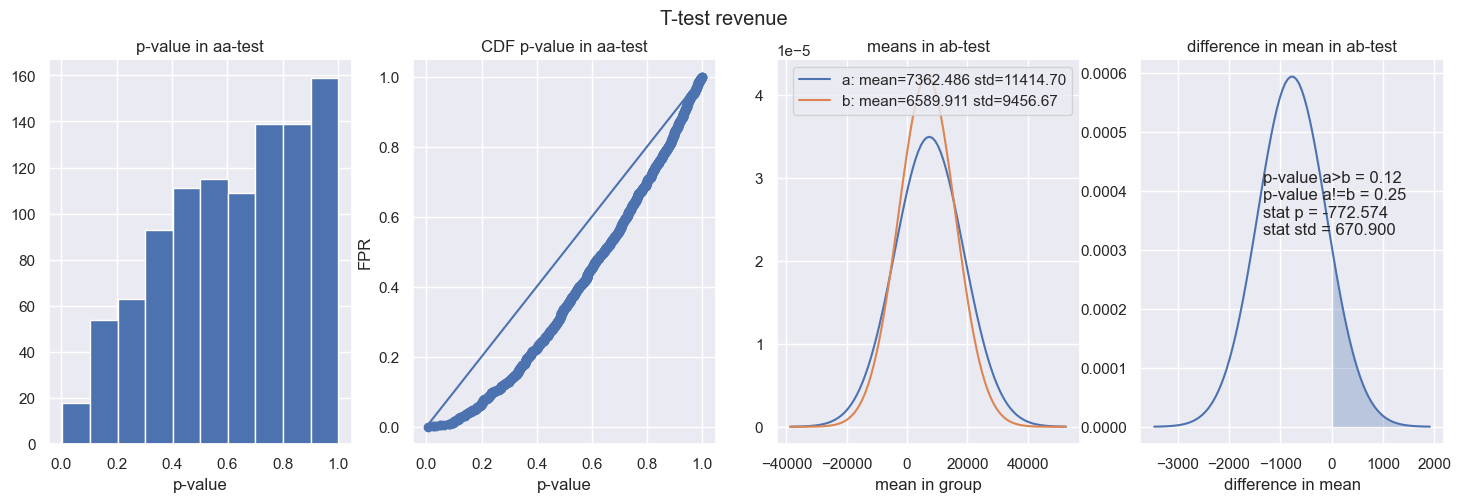

In [38]:
fun_perfom_ttest(df_reveue_A_ren, df_reveue_B_ren, 'revenue')